In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\sjsim\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
data= pd.read_csv("bmi.csv",index_col=-1)
#data= pd.read_csv("bmi.csv",index_col="label")

In [7]:
data.head()

,height,weight
label,,
normal,140,45
fat,145,72
fat,150,61
fat,137,56
thin,192,48


In [8]:
# 데이터 확인 
data.index.unique()

Index(['normal', 'fat', 'thin'], dtype='object', name='label')

In [9]:
data.shape

(20000, 2)

상관관계 확인

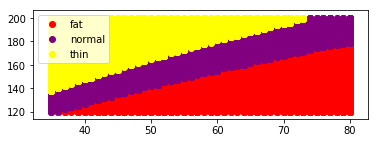

In [11]:
plt.figure(figsize=(6,2))
plt.scatter(data.loc["fat","weight"],data.loc["fat","height"],c="red",label="fat")
plt.scatter(data.loc["normal","weight"],data.loc["normal","height"],c="purple",label="normal")
plt.scatter(data.loc["thin","weight"],data.loc["thin","height"],c="yellow",label="thin")
plt.legend()

### 분석을 위해 문제 와 답으로 분리

In [14]:
data= pd.read_csv("bmi.csv")

In [15]:
train=data.iloc[:14000]
test=data.iloc[14000:]

In [16]:
train.shape, test.shape

((14000, 3), (6000, 3))

In [18]:
train.head()

,height,weight,label
0,140,45,normal
1,145,72,fat
2,150,61,fat
3,137,56,fat
4,192,48,thin


train 과 test를 7:3으로 분리 

In [19]:
X_train=train.iloc[:,:2]
y_train=train.iloc[:,2]
X_test=test.iloc[:,:2]
y_test=test.iloc[:,2]

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14000, 2), (14000,), (6000, 2), (6000,))

### 모델 불러오기 (Knn)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
model=KNeighborsClassifier()

### 학습

In [24]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
model.predict(X_test)

array(['normal', 'thin', 'normal', ..., 'normal', 'normal', 'thin'],
      dtype=object)

In [26]:
model.score(X_test,y_test)

0.9946666666666667

In [27]:
model.predict([[170,80]])

array(['fat'], dtype=object)